# Практика застосування лінійної регресії

In [19]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

## EDA датасету California Housing

### Знайомство з даними

In [20]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Визначення цільової змінної

In [21]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

### Перевірка типів даних і відсутніх значень

In [22]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [23]:
data = california_housing['frame']

### Розподіл ознак

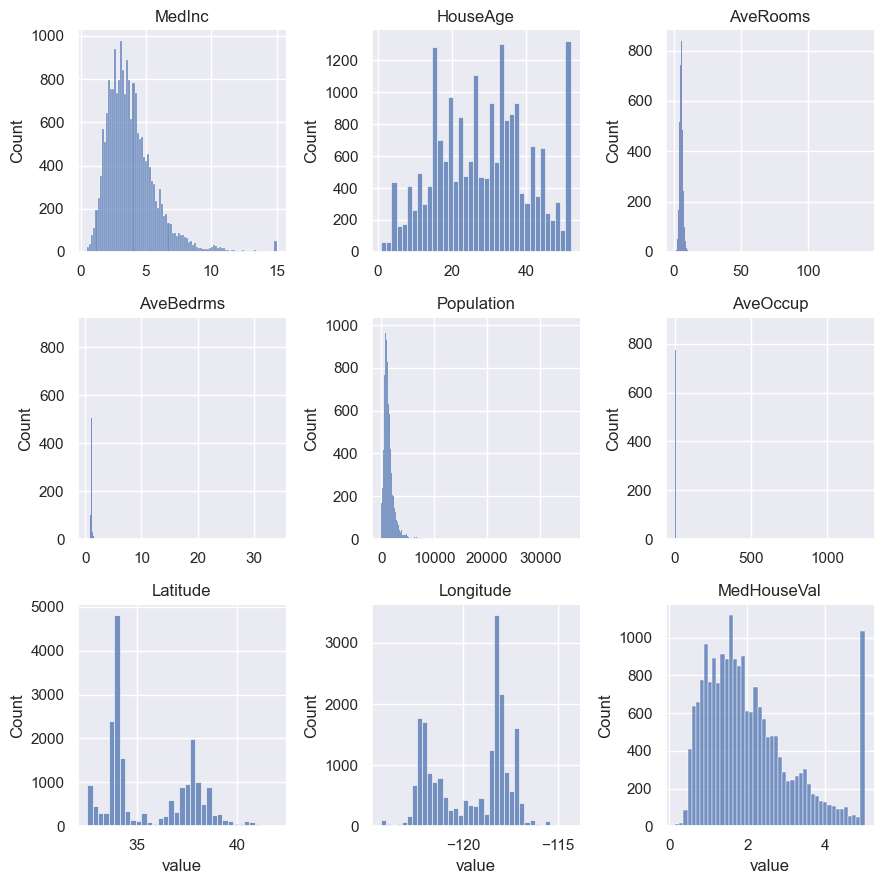

In [24]:
sns.set_theme()

melted = data.melt()

g = sns.FacetGrid(melted,
                  col='variable',
                  col_wrap=3,
                  sharex=False,
                  sharey=False)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    g.map(sns.histplot, 'value')

g.set_titles(col_template='{col_name}')

g.tight_layout()

In [25]:
features_of_interest = ['AveRooms', 'AveBedrms', 'AveOccup', 'Population']

# (!) Код для очистки від викидів...

outliers_idx = [283,570,576,710,780,799,864,865,867,869,871,922,985,995,1010,1021,1024,1039,1060,1086,1102,1233,1234,1235,1238,1239,1240,1560,1566,1642,1700,1867,1872,1879,1889,1910,1911,1912,1913,1914,1925,1926,1930,1978,1979,2025,2119,2294,2311,2392,2395,2396,2397,2398,2511,2776,2963,2975,2978,2999,3004,3086,3167,3177,3258,3292,3334,3350,3364,3413,3554,3560,3603,3607,3621,3648,3829,3871,3942,3981,4035,4264,4266,4267,4579,4616,4634,4636,4670,5538,5540,5724,5815,5921,5924,5963,5964,5968,5983,6055,6057,6058,6061,6063,6065,6066,6070,6143,6287,6289,6297,6298,6303,6328,6329,6338,6340,6401,6502,6516,6518,6550,6844,7130,7357,7361,7617,7864,7907,8467,8468,8520,8716,8717,8728,8804,8874,8985,8986,9004,9013,9018,9019,9027,9036,9040,9064,9081,9084,9114,9118,9122,9123,9128,9131,9133,9135,9145,9149,9154,9159,9166,9167,9170,9172,9183,9185,9193,9282,9286,9289,9331,9431,9451,9579,9671,9672,9676,9678,9681,9682,9683,9692,9693,9697,9716,9744,9748,9880,9881,10067,10076,10077,10078,10079,10080,10081,10082,10083,10084,10309,10539,10664,10842,10910,10921,10934,10948,10957,10997,11066,11067,11083,11349,11705,11706,11707,11708,11709,11710,11713,11714,11715,11716,11717,11719,11720,11721,11722,11725,11729,11775,11831,11832,11833,11834,11848,11849,11862,11865,11866,11867,11870,11960,11970,11976,11982,11989,12002,12006,12022,12039,12040,12041,12067,12072,12077,12097,12104,12106,12109,12114,12115,12119,12122,12126,12127,12128,12129,12132,12133,12135,12136,12137,12144,12152,12191,12194,12201,12204,12214,12215,12218,12227,12258,12303,12305,12306,12307,12344,12349,12354,12361,12365,12371,12372,12376,12390,12394,12396,12411,12422,12430,12441,12447,12623,12658,12663,12671,12703,12813,12814,12817,12868,12872,12954,12957,13034,13047,13051,13053,13080,13098,13099,13132,13139,13176,13181,13182,13221,13223,13226,13316,13370,13374,13377,13378,13379,13382,13383,13387,13399,13403,13422,13423,13424,13459,13517,13519,13715,13788,13816,13834,13848,13878,13889,13890,13900,13911,13912,13919,13923,13924,13939,13940,13941,13942,13943,13944,13945,13946,13947,13948,13950,13955,13956,13958,13959,13961,13963,13964,13965,13966,13967,13970,13971,13972,13973,13975,13976,13978,13979,13980,14209,14471,14505,14515,14543,14553,14558,14756,14805,14913,14931,14959,15049,15059,15061,15105,15108,15114,15117,15183,15203,15215,15220,15286,15336,15337,15360,15413,15459,15491,15500,15523,15524,15526,15527,15533,15544,15574,15579,16420,16559,16606,16669,16818,16820,16839,17024,17073,17185,17310,17413,17460,17551,17690,17752,17754,17761,17770,17777,17845,18209,18346,18349,18462,18681,18745,18858,18860,18875,18911,18926,18980,18985,19006,19362,19421,19452,19536,19574,19658,19736,19789,19800,19802,19803,19806,19807,19975,19976,19977,20093,20094,20112,20113,20121,20249,20278,20305,20308,20316,20318,20333,20336,20424,20427,20440,20451,20529,20530,20544,20563,20629]

cleaned_data = data.drop(index=outliers_idx)
cleaned_data.shape

(20135, 9)

### Вибір ознак для моделювання

Text(0.5, 1.0, 'Median house value depending of\n their spatial location')

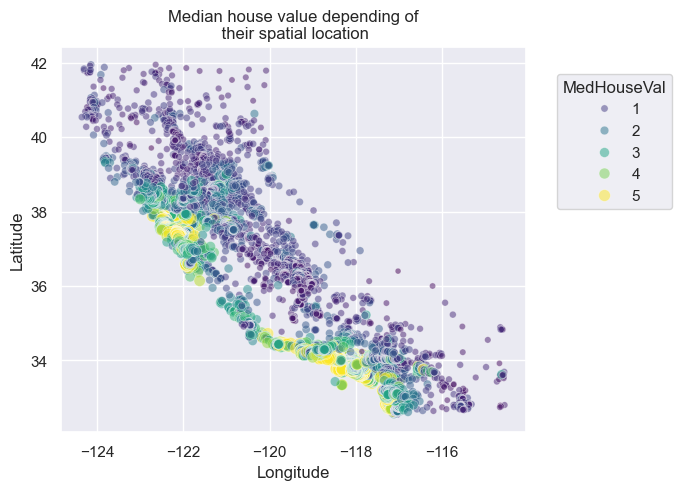

In [26]:
fig, ax = plt.subplots(figsize=(6, 5))

sns.scatterplot(
    data=cleaned_data,
    x='Longitude',
    y='Latitude',
    size='MedHouseVal',
    hue='MedHouseVal',
    palette='viridis',
    alpha=0.5,
    ax=ax)

plt.legend(
    title='MedHouseVal',
    bbox_to_anchor=(1.05, 0.95),
    loc='upper left')

plt.title('Median house value depending of\n their spatial location')

### Матриця кореляції змінних

<Axes: >

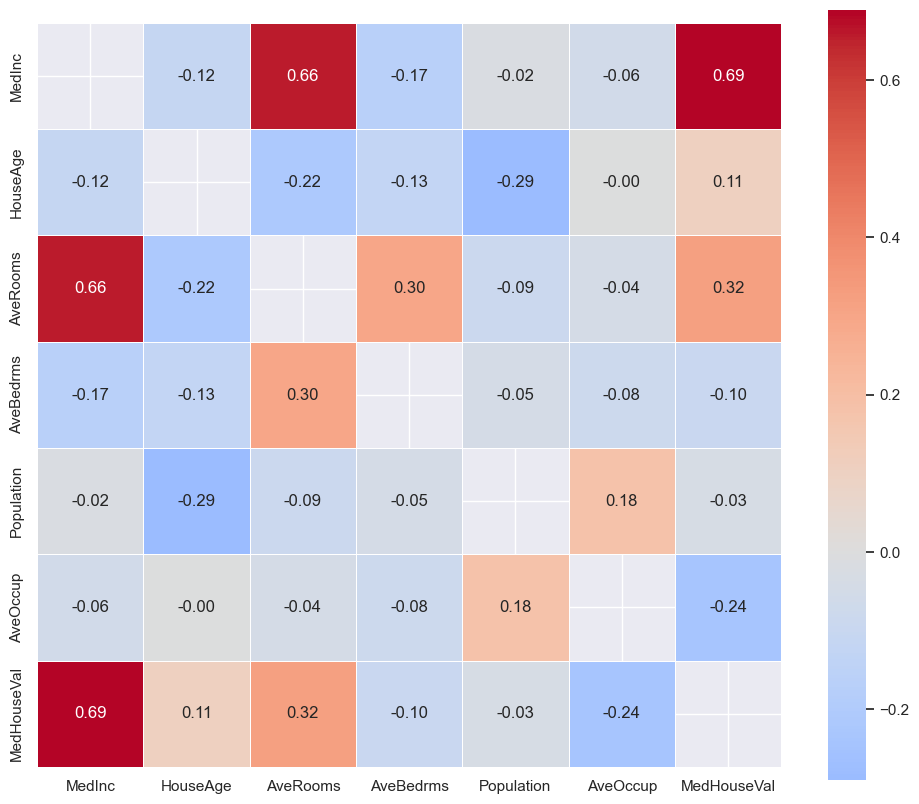

In [27]:
columns_drop = ['Longitude', 'Latitude']
subset = cleaned_data.drop(columns=columns_drop)

corr_mtx = subset.corr()

mask_mtx = np.zeros_like(corr_mtx)
np.fill_diagonal(mask_mtx, 1)

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr_mtx,
            cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.2f',
            linewidth=0.5,
            square=True,
            mask=mask_mtx,
            ax=ax)

In [28]:
removed_corr_data = cleaned_data.drop(columns='AveRooms')
#removed_corr_data = cleaned_data.copy()

## Підготовка і обробка даних

### Розбиття на тренувальну і тестову вибірки

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    removed_corr_data.drop(columns='MedHouseVal'),
    removed_corr_data['MedHouseVal'],
    test_size=0.2,
    random_state=13)

### Нормалізація змінних

In [30]:
scaler = StandardScaler().set_output(transform='pandas').fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled.describe()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.610800e+04,1.610800e+04,1.610800e+04,1.610800e+04,1.610800e+04,1.610800e+04,1.610800e+04
mean,-2.073225e-17,4.411117e-17,1.318924e-16,-9.528013e-17,2.082047e-16,-1.359065e-15,-1.164094e-15
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-1.757762e+00,-2.244508e+00,-5.479036e+00,-1.644876e+00,-2.558697e+00,-1.454976e+00,-2.375364e+00
25%,-6.823719e-01,-8.025563e-01,-4.713978e-01,-6.783580e-01,-5.841277e-01,-8.021616e-01,-1.111682e+00
50%,-1.831886e-01,-1.472069e-03,-1.529178e-01,-2.264953e-01,-1.286196e-01,-6.471768e-01,5.415925e-01
75%,4.518709e-01,6.393953e-01,2.207001e-01,4.322145e-01,4.120837e-01,9.778147e-01,7.863371e-01
max,5.780912e+00,1.841022e+00,1.078913e+01,4.284744e+00,3.645730e+01,2.964437e+00,2.519529e+00


## Навчання і оцінка моделі

### Побудова моделі

In [32]:
model = LinearRegression().fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

ymin, ymax = y_train.agg(['min', 'max']).values

y_pred = pd.Series(y_pred, index=X_test_scaled.index).clip(ymin, ymax)
y_pred.head()

14211    1.798358
8537     2.169339
13739    1.764487
7938     2.769345
8964     2.829161
dtype: float64

### Оцінювання точності моделі

In [33]:
r_sq = model.score(X_train_scaled, y_train)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'R2: {r_sq:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}')

R2: 0.65 | MAE: 0.49 | MAPE: 0.30


In [34]:
pd.Series(model.coef_, index=X_train_scaled.columns)

MedInc        0.728985
HouseAge      0.148567
AveBedrms     0.094341
Population    0.046662
AveOccup     -0.237929
Latitude     -1.001789
Longitude    -0.922847
dtype: float64

### Поліноміальна регресія

In [35]:
# [a, b] -> [1, a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2).set_output(transform='pandas')

Xtr = poly.fit_transform(X_train_scaled)
Xts = poly.transform(X_test_scaled)

model_upd = LinearRegression().fit(Xtr, y_train)
y_pred_upd = model_upd.predict(Xts)
y_pred_upd = pd.Series(y_pred_upd, index=Xts.index).clip(ymin, ymax)

r_sq_upd = model_upd.score(Xtr, y_train)
mae_upd = mean_absolute_error(y_test, y_pred_upd)
mape_upd = mean_absolute_percentage_error(y_test, y_pred_upd)

print(f'R2: {r_sq_upd:.2f} | MAE: {mae_upd:.2f} | MAPE: {mape_upd:.2f}')

R2: 0.70 | MAE: 0.46 | MAPE: 0.27


## Продовження очистки даних

In [36]:
clipped_data = cleaned_data[cleaned_data['MedHouseVal'] < 5]
clipped_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,19154.0,3.668879,1.568135,0.499900,2.520800,3.437500,4.573350,15.000100
HouseAge,19154.0,28.712958,12.397298,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,19154.0,5.223713,1.211197,0.846154,4.408145,5.167922,5.944617,12.500000
AveBedrms,19154.0,1.068346,0.136053,0.333333,1.004774,1.047619,1.097561,2.514610
Population,19154.0,1353.200010,815.434336,3.000000,797.000000,1171.000000,1709.500000,4819.000000
AveOccup,19154.0,2.953030,0.883574,0.750000,2.446222,2.837119,3.304625,33.952941
Latitude,19154.0,35.649885,2.146721,32.540000,33.930000,34.270000,37.730000,41.950000
Longitude,19154.0,-119.577214,2.005239,-124.350000,-121.780000,-118.510000,-118.010000,-114.550000
MedHouseVal,19154.0,1.923310,0.974206,0.149990,1.161000,1.740000,2.485750,4.991000


Text(0.5, 1.0, 'Median house value depending of\n their spatial location')

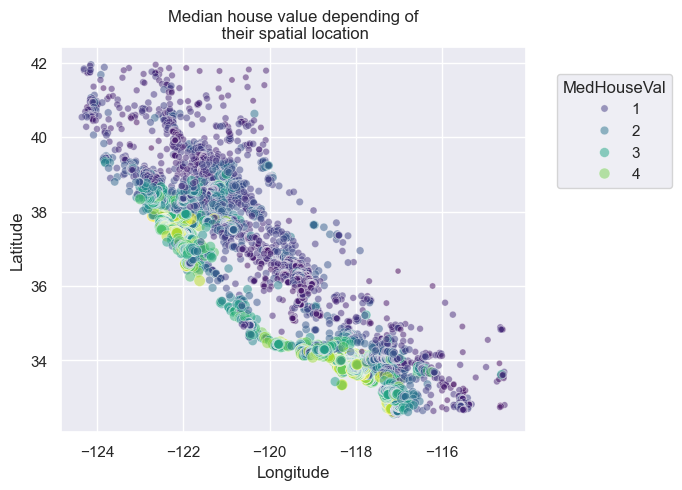

In [37]:
fig, ax = plt.subplots(figsize=(6, 5))

sns.scatterplot(
    data=clipped_data,
    x='Longitude',
    y='Latitude',
    size='MedHouseVal',
    hue='MedHouseVal',
    palette='viridis',
    alpha=0.5,
    ax=ax)

plt.legend(
    title='MedHouseVal',
    bbox_to_anchor=(1.05, 0.95),
    loc='upper left')

plt.title('Median house value depending of\n their spatial location')

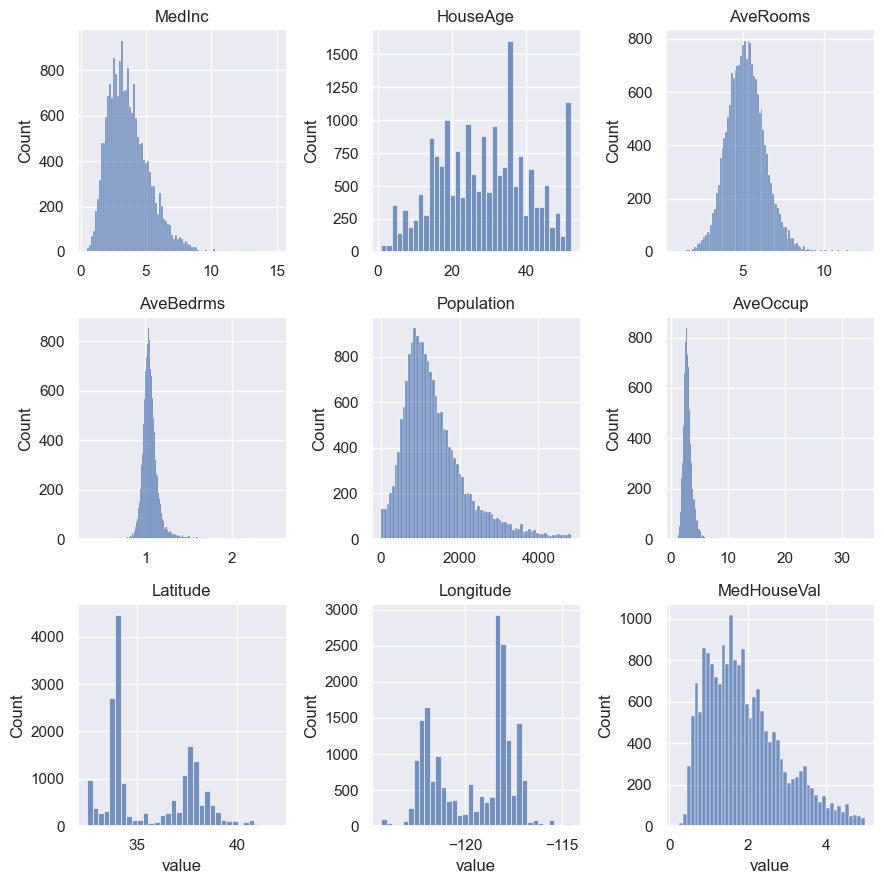

In [38]:
sns.set_theme()

melted = clipped_data.melt()

g = sns.FacetGrid(melted,
                  col='variable',
                  col_wrap=3,
                  sharex=False,
                  sharey=False)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    g.map(sns.histplot, 'value')

g.set_titles(col_template='{col_name}')

g.tight_layout()

<Axes: >

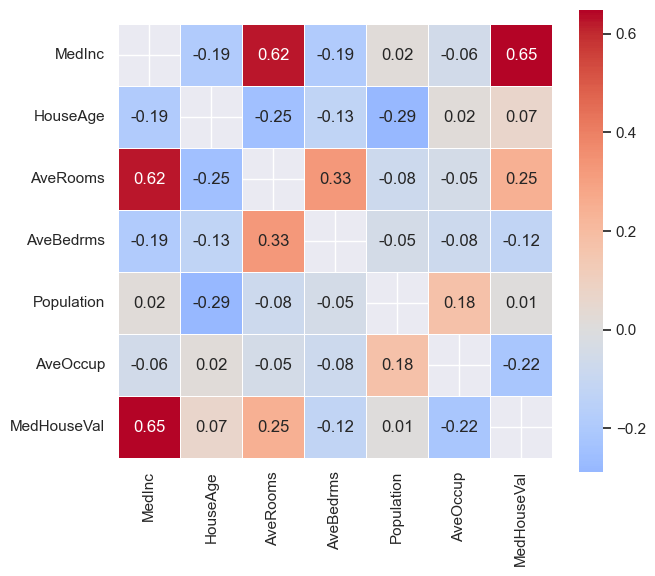

In [39]:
columns_drop = ['Longitude', 'Latitude']
subset = clipped_data.drop(columns=columns_drop)

corr_mtx = subset.corr()

mask_mtx = np.zeros_like(corr_mtx)
np.fill_diagonal(mask_mtx, 1)

fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(corr_mtx,
            cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.2f',
            linewidth=0.5,
            square=True,
            mask=mask_mtx,
            ax=ax)

['AveRooms']


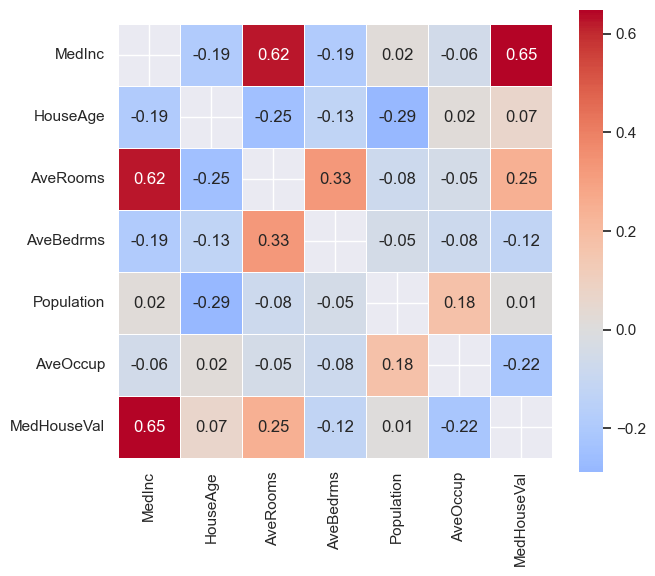

In [40]:
cols_to_skip = ['Longitude', 'Latitude']
corr_mtx = clipped_data.drop(columns=cols_to_skip).corr()

all_columns = corr_mtx.columns.tolist()
cols_to_drop = []

for ci in all_columns:
    for cj in all_columns:
        if ci == 'MedHouseVal' \
        or cj == 'MedHouseVal' \
        or all_columns.index(cj) >= all_columns.index(ci):
            continue
        else:
            if np.abs(corr_mtx.loc[ci, cj]) > 0.6:
                if np.abs(corr_mtx.loc['MedHouseVal', ci]) > np.abs(corr_mtx.loc['MedHouseVal', cj]):
                    cols_to_drop.append(cj)
                else:
                    cols_to_drop.append(ci)

plt.figure(figsize=(7, 6))
sns.heatmap(corr_mtx,
            cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.2f',
            linewidth=0.5,
            square=True,
            mask=mask_mtx)

print(cols_to_drop)

In [41]:
removed_corr_data = clipped_data.drop(columns=cols_to_drop)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    removed_corr_data.drop(columns='MedHouseVal'),
    removed_corr_data['MedHouseVal'],
    test_size=0.2,
    random_state=42)

scaler = StandardScaler().set_output(transform='pandas').fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression().fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

ymin, ymax = y_train.agg(['min', 'max']).values

y_pred = pd.Series(y_pred, index=X_test_scaled.index).clip(ymin, ymax)

r_sq = model.score(X_train_scaled, y_train)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'R2: {r_sq:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}')

R2: 0.61 | MAE: 0.44 | MAPE: 0.29


In [43]:
# [a, b] -> [1, a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2).set_output(transform='pandas')

Xtr = poly.fit_transform(X_train_scaled)
Xts = poly.transform(X_test_scaled)

model_upd = LinearRegression().fit(Xtr, y_train)
y_pred_upd = model_upd.predict(Xts)
y_pred_upd = pd.Series(y_pred_upd, index=Xts.index).clip(ymin, ymax)

r_sq_upd = model_upd.score(Xtr, y_train)
mae_upd = mean_absolute_error(y_test, y_pred_upd)
mape_upd = mean_absolute_percentage_error(y_test, y_pred_upd)

print(f'R2: {r_sq_upd:.2f} | MAE: {mae_upd:.2f} | MAPE: {mape_upd:.2f}')

R2: 0.66 | MAE: 0.40 | MAPE: 0.25
